# Import the prepared data and required libraries

In this part of the project we will compare different statistical learning algorithms on the already prepared dataset.
We use cross validation for all models. Furthermore the confusion matrix is plotet for each trained model to be able to review false positive and false negative classification results.

In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [145]:
df_train = pd.read_csv('prepared_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [146]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null int64
Q              889 non-null int64
S              889 non-null int64
dtypes: float64(2), int64(8)
memory usage: 69.5 KB


In the following lines of code the dataset is split into a train and a (for the model unknown) test dataset.

In [147]:
X = df_train.drop('Survived',axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Decision tree model

We start with a decision tree. Although this model is probably outperformed, due to the ability to visualize the trained decions we can infer some underlying rules from a decision tree.

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [150]:
predictions = dtree.predict(X_test)

Here we print the training results for the decision tree.

In [151]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[132  29]
 [ 30  76]]


             precision    recall  f1-score   support

          0       0.81      0.82      0.82       161
          1       0.72      0.72      0.72       106

avg / total       0.78      0.78      0.78       267



As we can see from the results the models overall accuracy is 78% and it predicts generally speaking "deceased" better than "survived".

Next Up we show the actual decisiontreee from the model.
Note this requires that Graphviz si installed on your computer. Visit https://graphviz.gitlab.io/download/
for more information on how to install Graphviz.

In [152]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X)
features

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

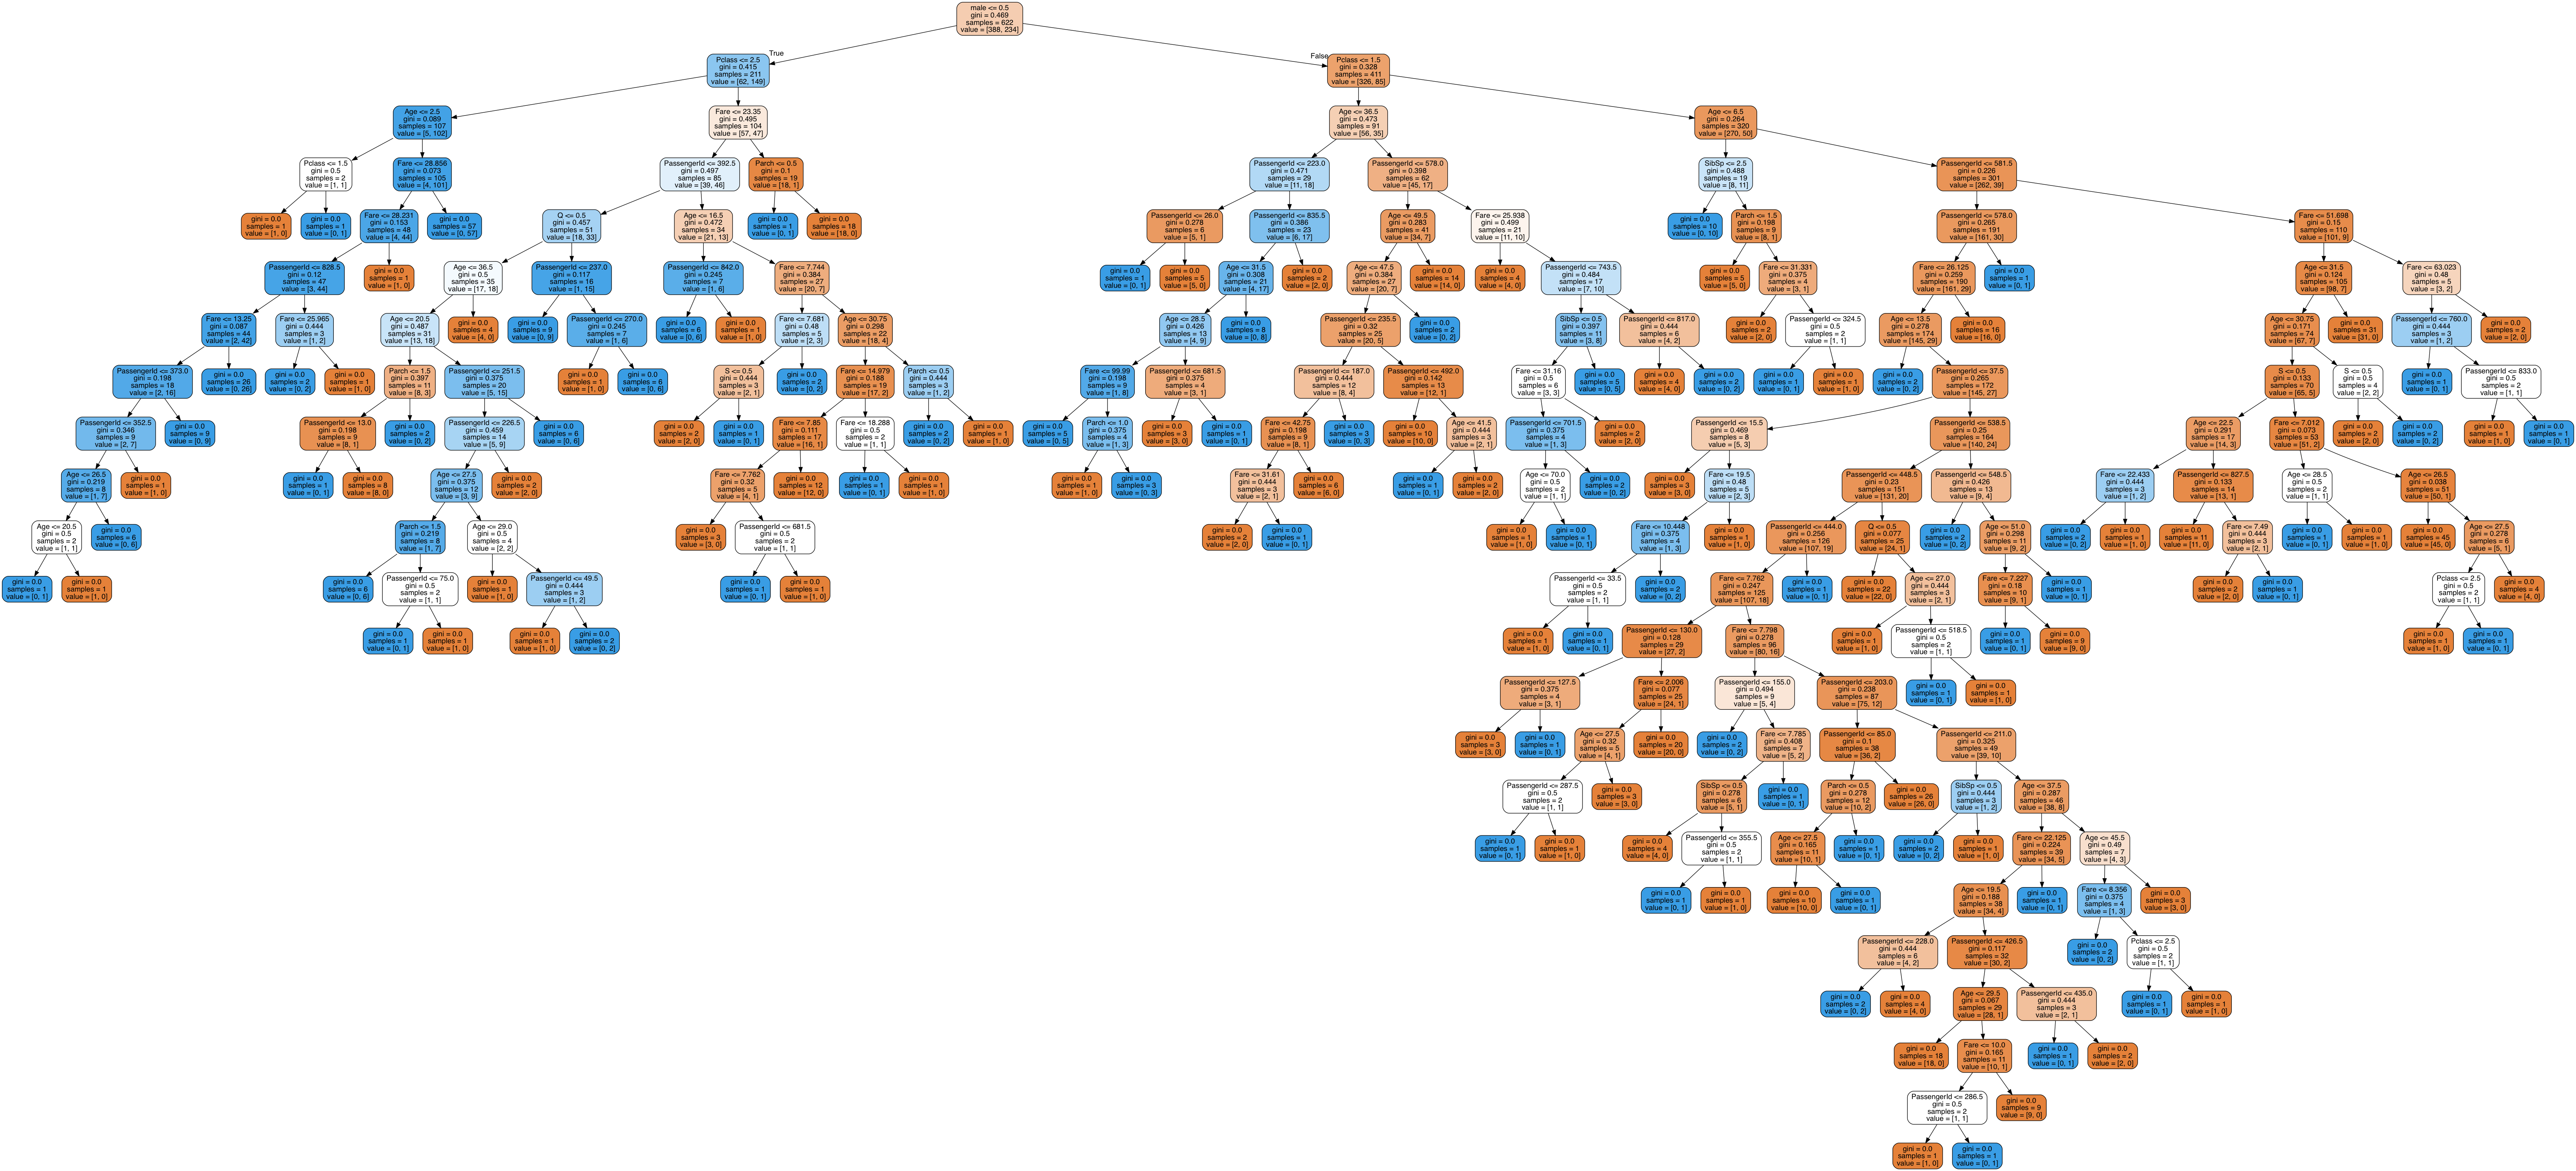

In [153]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

From the visualization we can see one thing clearly and that is that the column 'male' is the strongest predictor in the dataset. This is because it was choosen for the first decision.
Note that in each decision only one column is used.

# Random Forest model

What is better than one tree. You guessed right many trees or a forest.
Here we use 100 decision trees and combine the results to improve the prediction accuracy.

Random in the context of a Random Forest classifier is twofold. Each decision tree gets a subset of 1/100 of the size of the training data. Furthermore to ensure that the strong predictor seen on the decision tree visualization is not always present for each decision tree. Each tree only get a subset the column. Lets denote p as the count of columns.
This approach uses sqrt(p) features for each decision. This is necessary because if all 100 decision trees had access to all columns they would all decide similary. Which would result in a model of 100 decision trees that is not much better than a single decision tree.

In [154]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[140  21]
 [ 29  77]]


             precision    recall  f1-score   support

          0       0.83      0.87      0.85       161
          1       0.79      0.73      0.75       106

avg / total       0.81      0.81      0.81       267



If we compare the results from the Random Forest to the decision tree we see that we have increased the accuracy by 3%.

# Support Vector Machines

One of the more complex statistical learning algorithms are support vector machines. 
Although the uasge of the model is very similar to the decision tree based aproaches earlier a lot more is going on under the hood during the training.

In this section three different kernels are evaluated.
For more details on kernels and Support Vector Machines visit http://scikit-learn.org/stable/modules/svm.html.

In [156]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [157]:
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[161   0]
 [106   0]]


             precision    recall  f1-score   support

          0       0.60      1.00      0.75       161
          1       0.00      0.00      0.00       106

avg / total       0.36      0.60      0.45       267



/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [158]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[145  16]
 [ 25  81]]


             precision    recall  f1-score   support

          0       0.85      0.90      0.88       161
          1       0.84      0.76      0.80       106

avg / total       0.85      0.85      0.85       267



In [159]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159   2]
 [ 70  36]]


             precision    recall  f1-score   support

          0       0.69      0.99      0.82       161
          1       0.95      0.34      0.50       106

avg / total       0.79      0.73      0.69       267



If we compare the result from the three Support Vector Machines we can see a wide spreac in the prediction accuracy. It ranges from 36% to 85%. From my perspective it is hard if not impossible to tell which algorithm suits the data best. Therfore this is a lot of trial and error.
On the plus side this is usually fast - at least for small subsets of the data - and the data preparation consumes more time.

# Neural Network (scikit-learn)

Last but not least we use a multilayer perceptron for the classification.
for a detailed instruction for the multilayer perceptron see http://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised

We will also compare different solvers for this dataset as shown on http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py.

In [160]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

We start by creating the different parameters for a MLP we want to compare

In [161]:
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

In [162]:
labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

In [163]:
def plot_on_dataset(X, y):
    # plot learning for each learning strategy
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
        
    return mlps

In [164]:
plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

Here the different models are trained and the trainded models are return so we can visualize them.

In [165]:
mlps = plot_on_dataset(X_train,y_train)

training: constant learning-rate
Training set score: 0.807074
Training set loss: 0.475572
training: constant with momentum
Training set score: 0.800643
Training set loss: 0.483785
training: constant with Nesterov's momentum
Training set score: 0.802251
Training set loss: 0.480895
training: inv-scaling learning-rate
Training set score: 0.623794
Training set loss: 0.624722
training: inv-scaling with momentum
Training set score: 0.763666
Training set loss: 0.509408
training: inv-scaling with Nesterov's momentum
Training set score: 0.623794
Training set loss: 0.708075
training: adam
Training set score: 0.810289
Training set loss: 0.438814


As the last programmatic step the actual plot is created to compare the training results for each set of parameters.

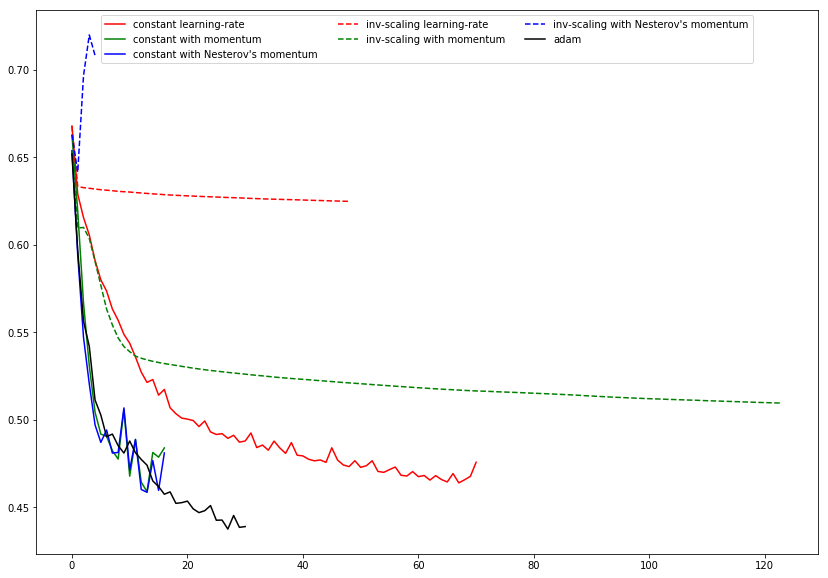

In [166]:
plt.figure(figsize=(14,10))
for label, mlp, args in zip(labels, mlps, plot_args):
    plt.plot(mlp.loss_curve_, label=label, **args)
    
plt.legend(labels, ncol=3, loc="upper center")

As we can see from the plot above the 'adam' solver creates a model mit the best accuracy, but we can also see that the differences between the different solvers and parameters are quite large.